In [5]:
import pandas as pd
import numpy as np

# Treat outliers
from scipy.stats import zscore


# Standardize values------------------------
from sklearn.preprocessing import StandardScaler

# ML models---------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

# Ploting-----------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Dimension reduction-----------------------
from sklearn.decomposition import PCA

# Metrics for clusterization----------------
from sklearn.metrics import silhouette_score

# 3D visualization--------------------------
import plotly.graph_objects as go

import numpy as np
from scipy.stats import zscore


# Standardize values------------------------
from sklearn.preprocessing import StandardScaler

# ML models---------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

# Ploting-----------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Dimension reduction-----------------------
from sklearn.decomposition import PCA

# Metrics for clusterization----------------
from sklearn.metrics import silhouette_score

# 3D visualization--------------------------
import plotly.graph_objects as go

# Preprocessing

In [66]:
df_transactions = pd.read_csv('transactions_punks_final.csv')
df_traits_dummies = pd.read_csv('transactions_punks_dummies.csv')

In [67]:
df_transactions_sold = df_transactions[df_transactions['type'] == 'Sold']
df_dummies_sold = df_traits_dummies[df_traits_dummies['trans_type'] == 'Sold']

In [48]:
print(df_transactions_sold.columns.tolist())
print(df_dummies_sold.columns.tolist())

['Unnamed: 0', 'index', 'id', 'punk_id', 'type', 'from', 'to', 'amount_ether', 'amount_$', 'date', 'id.1', 'rarity', 'type.1', 'skin', 'traits']
['Unnamed: 0', 'index', 'punk_id', 'trans_type', 'from', 'to', 'amount_ether', 'amount_$', 'date', 'rarity', 'type', 'skin', 'traits', 'traits_counts', "'Bandana'", "'Beanie", "'Beanie'", "'BigBeard", "'BigBeard'", "'BigShades", "'BigShades'", "'BlackLipstick", "'BlackLipstick'", "'BlondeBob", "'BlondeBob'", "'BlondeShort", "'BlondeShort'", "'BlueEyeShadow", "'BlueEyeShadow'", "'BuckTeeth", "'BuckTeeth'", "'Cap", "'Cap'", "'CapForward", "'CapForward'", "'Chinstrap", "'Chinstrap'", "'Choker", "'Choker'", "'Cigarette", "'Cigarette'", "'ClassicShades", "'ClassicShades'", "'ClownEyesBlue", "'ClownEyesBlue'", "'ClownEyesGreen", "'ClownEyesGreen'", "'ClownHairGreen", "'ClownHairGreen'", "'ClownNose", "'ClownNose'", "'CowboyHat", "'CowboyHat'", "'CrazyHair", "'CrazyHair'", "'DarkHair", "'DarkHair'", "'Do-rag", "'Do-rag'", "'Earring", "'Earring'", "'E

In [68]:
cols_to_use = df_dummies_sold.columns.difference(df_transactions_sold.columns[2:])

In [56]:
cols_to_use

Index([''Bandana'', ''Beanie', ''Beanie'', ''BigBeard', ''BigBeard'',
       ''BigShades', ''BigShades'', ''BlackLipstick', ''BlackLipstick'',
       ''BlondeBob',
       ...
       'VampireHair'', 'Vape'', 'WeldingGoggles', 'WeldingGoggles'',
       'WildBlonde', 'WildHair', 'WildWhiteHair', 'index', 'traits_counts',
       'trans_type'],
      dtype='object', length=350)

In [69]:
df_fuente_ml = df_transactions_sold.merge(df_dummies_sold[cols_to_use], how='inner', on='index')

In [58]:
df_fuente_ml.columns.tolist()

['Unnamed: 0_x',
 'index',
 'id',
 'punk_id',
 'type',
 'from',
 'to',
 'amount_ether',
 'amount_$',
 'date',
 'id.1',
 'rarity',
 'type.1',
 'skin',
 'traits',
 "'Bandana'",
 "'Beanie",
 "'Beanie'",
 "'BigBeard",
 "'BigBeard'",
 "'BigShades",
 "'BigShades'",
 "'BlackLipstick",
 "'BlackLipstick'",
 "'BlondeBob",
 "'BlondeBob'",
 "'BlondeShort",
 "'BlondeShort'",
 "'BlueEyeShadow",
 "'BlueEyeShadow'",
 "'BuckTeeth",
 "'BuckTeeth'",
 "'Cap",
 "'Cap'",
 "'CapForward",
 "'CapForward'",
 "'Chinstrap",
 "'Chinstrap'",
 "'Choker",
 "'Choker'",
 "'Cigarette",
 "'Cigarette'",
 "'ClassicShades",
 "'ClassicShades'",
 "'ClownEyesBlue",
 "'ClownEyesBlue'",
 "'ClownEyesGreen",
 "'ClownEyesGreen'",
 "'ClownHairGreen",
 "'ClownHairGreen'",
 "'ClownNose",
 "'ClownNose'",
 "'CowboyHat",
 "'CowboyHat'",
 "'CrazyHair",
 "'CrazyHair'",
 "'DarkHair",
 "'DarkHair'",
 "'Do-rag",
 "'Do-rag'",
 "'Earring",
 "'Earring'",
 "'EyeMask",
 "'EyeMask'",
 "'EyePatch",
 "'EyePatch'",
 "'Fedora",
 "'Fedora'",
 "'FrontBea

In [107]:
# Separate date into year, month, date
df_fuente_ml['day'] = df_fuente_ml['date'].apply(lambda x: x.split('-')[2])

In [72]:
# SOPORTE

df_fuente_ml[df_fuente_ml['punk_id'] == 6397]

,Unnamed: 0_x,index,id,punk_id,type,from,to,amount_ether,amount_$,date,id.1,rarity,type.1,skin,traits,'Bandana','Beanie','BigBeard','BigShades','BlackLipstick','BlondeBob','BlondeShort','BlueEyeShadow','BuckTeeth','Cap','CapForward','Chinstrap','Choker','Cigarette','ClassicShades','ClownEyesBlue','ClownEyesGreen','ClownHairGreen','ClownNose','CowboyHat','CrazyHair','DGlasses','DarkHair','Do-rag','Earring','EyeMask','EyePatch','Fedora','FrontBeard','FrontBeardDark','Frown','FrumpyHair','Goat','GoldChain','GreenEyeShadow','HalfShaved','Handlebars','Headband','HiddenBuckTeeth','HiddenEarring','HiddenFrown','HiddenHandlebars','HiddenLipstick','HiddenMole','HiddenMustache','HiddenSmile','Hoodie','HornedRimGlasses','HotLipstick','KnittedCap','LuxuriousBeard','MedicalMask','MessyHair','Mohawk','MohawkDark','MohawkThin','Mole','Mustache','Muttonchops','NerdGlasses','NormalBeard','NormalBeardBlack','OrangeSide','PeakSpike','Pigtails','PilotHelmet','PinkWithHat','Pipe','PoliceCap','PurpleEyeShadow','PurpleHair','PurpleLipstick','RedMohawk','RegularShades','RosyCheeks','ShadowBeard','ShavedHead','SilverChain','SmallShades','Smile','Spots','StraightHair','StraightHairBlonde','StraightHairDark','StringyHair','TassleHat','Tiara','TopHat','VR','VampireHair','Vape','WeldingGoggles','WildBlonde','WildHair','WildWhiteHair',Unnamed: 0_y,traits_counts,trans_type
15953,166320,99926,0xf41dd9,6397,Sold,0xA317cd,0x9428e5,31.80,80651.50,2021-07-31,6397,5996.0,Male,Dark,"['Cap', 'Earring', 'FrontBeard']",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166320,3,Sold
15954,166337,99941,0x96b2b6,6397,Sold,0x62bdc6,0xa4290d,24.97,53419.60,2021-04-12,6397,5996.0,Male,Dark,"['Cap', 'Earring', 'FrontBeard']",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166337,3,Sold
15956,166347,99950,0xcd9644,6397,Sold,0x63a9db,0xca4a5b,1.61,607.40,2020-09-14,6397,5996.0,Male,Dark,"['Cap', 'Earring', 'FrontBeard']",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166347,3,Sold
15957,166354,99957,0x74e716,6397,Sold,0x274008,0x63a9db,0.68,138.01,2020-05-14,6397,5996.0,Male,Dark,"['Cap', 'Earring', 'FrontBeard']",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166354,3,Sold
15958,166358,99960,0x42d6a3,6397,Sold,0xf0f068,0x274008,0.66,110.20,2020-01-19,6397,5996.0,Male,Dark,"['Cap', 'Earring', 'FrontBeard']",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166358,3,Sold
15959,166363,99965,0xf0a5a8,6397,Sold,0x6611fE,0xf0f068,0.55,77.69,2020-01-08,6397,5996.0,Male,Dark,"['Cap', 'Earring', 'FrontBeard']",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166363,3,Sold


In [73]:
df_dummies_sold[df_dummies_sold['punk_id'] == 6397]

,Unnamed: 0,index,punk_id,trans_type,from,to,amount_ether,amount_$,date,rarity,type,skin,traits,traits_counts,'Bandana','Beanie','BigBeard','BigShades','BlackLipstick','BlondeBob','BlondeShort','BlueEyeShadow','BuckTeeth','Cap','CapForward','Chinstrap','Choker','Cigarette','ClassicShades','ClownEyesBlue','ClownEyesGreen','ClownHairGreen','ClownNose','CowboyHat','CrazyHair','DGlasses','DarkHair','Do-rag','Earring','EyeMask','EyePatch','Fedora','FrontBeard','FrontBeardDark','Frown','FrumpyHair','Goat','GoldChain','GreenEyeShadow','HalfShaved','Handlebars','Headband','HiddenBuckTeeth','HiddenEarring','HiddenFrown','HiddenHandlebars','HiddenLipstick','HiddenMole','HiddenMustache','HiddenSmile','Hoodie','HornedRimGlasses','HotLipstick','KnittedCap','LuxuriousBeard','MedicalMask','MessyHair','Mohawk','MohawkDark','MohawkThin','Mole','Mustache','Muttonchops','NerdGlasses','NormalBeard','NormalBeardBlack','OrangeSide','PeakSpike','Pigtails','PilotHelmet','PinkWithHat','Pipe','PoliceCap','PurpleEyeShadow','PurpleHair','PurpleLipstick','RedMohawk','RegularShades','RosyCheeks','ShadowBeard','ShavedHead','SilverChain','SmallShades','Smile','Spots','StraightHair','StraightHairBlonde','StraightHairDark','StringyHair','TassleHat','Tiara','TopHat','VR','VampireHair','Vape','WeldingGoggles','WildBlonde','WildHair','WildWhiteHair'
166320,166320,99926,6397,Sold,0xA317cd,0x9428e5,31.80,80651.50,2021-07-31,5996.0,Male,Dark,"'Cap', 'Earring', 'FrontBeard'",3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
166337,166337,99941,6397,Sold,0x62bdc6,0xa4290d,24.97,53419.60,2021-04-12,5996.0,Male,Dark,"'Cap', 'Earring', 'FrontBeard'",3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
166347,166347,99950,6397,Sold,0x63a9db,0xca4a5b,1.61,607.40,2020-09-14,5996.0,Male,Dark,"'Cap', 'Earring', 'FrontBeard'",3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
166354,166354,99957,6397,Sold,0x274008,0x63a9db,0.68,138.01,2020-05-14,5996.0,Male,Dark,"'Cap', 'Earring', 'FrontBeard'",3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
166358,166358,99960,6397,Sold,0xf0f068,0x274008,0.66,110.20,2020-01-19,5996.0,Male,Dark,"'Cap', 'Earring', 'FrontBeard'",3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
166363,166363,99965,6397,Sold,0x6611fE,0xf0f068,0.55,77.69,2020-01-08,5996.0,Male,Dark,"'Cap', 'Earring', 'FrontBeard'",3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
pd.set_option('display.max_columns', None)

In [108]:
df_fuente_ml.head(1) 

,Unnamed: 0_x,index,id,punk_id,type,from,to,amount_ether,amount_$,date,id.1,rarity,type.1,skin,traits,'Bandana','Beanie','BigBeard','BigShades','BlackLipstick','BlondeBob','BlondeShort','BlueEyeShadow','BuckTeeth','Cap','CapForward','Chinstrap','Choker','Cigarette','ClassicShades','ClownEyesBlue','ClownEyesGreen','ClownHairGreen','ClownNose','CowboyHat','CrazyHair','DGlasses','DarkHair','Do-rag','Earring','EyeMask','EyePatch','Fedora','FrontBeard','FrontBeardDark','Frown','FrumpyHair','Goat','GoldChain','GreenEyeShadow','HalfShaved','Handlebars','Headband','HiddenBuckTeeth','HiddenEarring','HiddenFrown','HiddenHandlebars','HiddenLipstick','HiddenMole','HiddenMustache','HiddenSmile','Hoodie','HornedRimGlasses','HotLipstick','KnittedCap','LuxuriousBeard','MedicalMask','MessyHair','Mohawk','MohawkDark','MohawkThin','Mole','Mustache','Muttonchops','NerdGlasses','NormalBeard','NormalBeardBlack','OrangeSide','PeakSpike','Pigtails','PilotHelmet','PinkWithHat','Pipe','PoliceCap','PurpleEyeShadow','PurpleHair','PurpleLipstick','RedMohawk','RegularShades','RosyCheeks','ShadowBeard','ShavedHead','SilverChain','SmallShades','Smile','Spots','StraightHair','StraightHairBlonde','StraightHairDark','StringyHair','TassleHat','Tiara','TopHat','VR','VampireHair','Vape','WeldingGoggles','WildBlonde','WildHair','WildWhiteHair',Unnamed: 0_y,traits_counts,trans_type,year,month,day
0,17,100010,0x953cae,6401,Sold,0x577eBC,0x561786,19.99,39866.7,2021-07-14,6401,5693.0,Female,Mid,"['BlackLipstick', 'BlueEyeShadow', 'MessyHair']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,3,Sold,2021,07,14


In [114]:
df_fuente_ml_aaz = df_fuente_ml[(df_fuente_ml['type.1'] == 'Zombie') | (df_fuente_ml['type.1'] == 'Ape') | (df_fuente_ml['type.1'] == 'Alien')]

In [115]:
df_fuente_ml_aaz.shape

(135, 116)

In [116]:
df_fuente_ml_humanos = df_fuente_ml[(df_fuente_ml['type.1'] == 'Male') | (df_fuente_ml['type.1'] == 'Female')]

In [127]:
df_fuente_ml_humanos.shape

(15829, 116)

In [136]:
# Get dummies for types female and male
df_fuente_ml_humanos = pd.get_dummies(df_fuente_ml_humanos, columns=['skin'])

In [137]:
df_fuente_ml_humanos.shape

(15829, 120)

In [138]:
df_fuente_ml_humanos.head(1)

,Unnamed: 0_x,index,id,punk_id,type,from,to,amount_ether,amount_$,date,id.1,rarity,traits,'Bandana','Beanie','BigBeard','BigShades','BlackLipstick','BlondeBob','BlondeShort','BlueEyeShadow','BuckTeeth','Cap','CapForward','Chinstrap','Choker','Cigarette','ClassicShades','ClownEyesBlue','ClownEyesGreen','ClownHairGreen','ClownNose','CowboyHat','CrazyHair','DGlasses','DarkHair','Do-rag','Earring','EyeMask','EyePatch','Fedora','FrontBeard','FrontBeardDark','Frown','FrumpyHair','Goat','GoldChain','GreenEyeShadow','HalfShaved','Handlebars','Headband','HiddenBuckTeeth','HiddenEarring','HiddenFrown','HiddenHandlebars','HiddenLipstick','HiddenMole','HiddenMustache','HiddenSmile','Hoodie','HornedRimGlasses','HotLipstick','KnittedCap','LuxuriousBeard','MedicalMask','MessyHair','Mohawk','MohawkDark','MohawkThin','Mole','Mustache','Muttonchops','NerdGlasses','NormalBeard','NormalBeardBlack','OrangeSide','PeakSpike','Pigtails','PilotHelmet','PinkWithHat','Pipe','PoliceCap','PurpleEyeShadow','PurpleHair','PurpleLipstick','RedMohawk','RegularShades','RosyCheeks','ShadowBeard','ShavedHead','SilverChain','SmallShades','Smile','Spots','StraightHair','StraightHairBlonde','StraightHairDark','StringyHair','TassleHat','Tiara','TopHat','VR','VampireHair','Vape','WeldingGoggles','WildBlonde','WildHair','WildWhiteHair',Unnamed: 0_y,traits_counts,trans_type,year,month,day,type.1_Female,type.1_Male,skin_Albino,skin_Dark,skin_Light,skin_Mid
0,17,100010,0x953cae,6401,Sold,0x577eBC,0x561786,19.99,39866.7,2021-07-14,6401,5693.0,"['BlackLipstick', 'BlueEyeShadow', 'MessyHair']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,3,Sold,2021,07,14,1,0,0,0,0,1


In [249]:
df_fuente_ml_humanos.to_csv('df_fuente_ml_humanos.csv')

In [139]:
# Remove first set of columns for first model
columnas_drop_1 = ['Unnamed: 0_x', 
                   'index', 
                   'id', 
                   'punk_id', 
                   'type', 
                   'from', 
                   'to', 
                   'amount_ether',
                   'date',
                   'id.1', 
                   'traits', 
                   'Unnamed: 0_y', 
                   'trans_type']
df_fuente_ml_humanos_1 = df_fuente_ml_humanos.drop(columns=columnas_drop_1, axis=1)

# Clustering

In [134]:
df_fuente_ml_humanos_1.describe()

,amount_$,rarity,'Bandana','Beanie','BigBeard','BigShades','BlackLipstick','BlondeBob','BlondeShort','BlueEyeShadow','BuckTeeth','Cap','CapForward','Chinstrap','Choker','Cigarette','ClassicShades','ClownEyesBlue','ClownEyesGreen','ClownHairGreen','ClownNose','CowboyHat','CrazyHair','DGlasses','DarkHair','Do-rag','Earring','EyeMask','EyePatch','Fedora','FrontBeard','FrontBeardDark','Frown','FrumpyHair','Goat','GoldChain','GreenEyeShadow','HalfShaved','Handlebars','Headband','HiddenBuckTeeth','HiddenEarring','HiddenFrown','HiddenHandlebars','HiddenLipstick','HiddenMole','HiddenMustache','HiddenSmile','Hoodie','HornedRimGlasses','HotLipstick','KnittedCap','LuxuriousBeard','MedicalMask','MessyHair','Mohawk','MohawkDark','MohawkThin','Mole','Mustache','Muttonchops','NerdGlasses','NormalBeard','NormalBeardBlack','OrangeSide','PeakSpike','Pigtails','PilotHelmet','PinkWithHat','Pipe','PoliceCap','PurpleEyeShadow','PurpleHair','PurpleLipstick','RedMohawk','RegularShades','RosyCheeks','ShadowBeard','ShavedHead','SilverChain','SmallShades','Smile','Spots','StraightHair','StraightHairBlonde','StraightHairDark','StringyHair','TassleHat','Tiara','TopHat','VR','VampireHair','Vape','WeldingGoggles','WildBlonde','WildHair','WildWhiteHair',traits_counts,type.1_Female,type.1_Male
count,1.582900e+04,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.0,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000,15829.000000
mean,5.163768e+04,5291.126098,0.055089,0.005749,0.013709,0.052372,0.060648,0.009034,0.009539,0.025207,0.005244,0.030766,0.028113,0.037526,0.003791,0.095015,0.057489,0.038663,0.038221,0.015920,0.020406,0.013393,0.033609,0.021732,0.015983,0.037652,0.258639,0.031524,0.047508,0.022111,0.032914,0.032788,0.031145,0.045612,0.035884,0.013204,0.021290,0.011877,0.030324,0.043528,0.0,0.042643,0.005054,0.000442,0.001706,0.003727,0.000126,0.002780,0.021101,0.056542,0.056731,0.042959,0.022427,0.015667,0.044791,0.046307,0.046244,0.051109,0.077390,0.034494,0.036199,0.057616,0.033925,0.026155,0.005433,0.030198,0.006697,0.004106,0.007076,0.030008,0.018826,0.026091,0.016805,0.056731,0.011687,0.052183,0.012382,0.055089,0.036957,0.020216,0.040748,0.022869,0.013077,0.014783,0.012698,0.015541,0.059511,0.013077,0.004043,0.010424,0.031019,0.020658,0.022427,0.005559,0.007202,0.042896,0.009539,2.845916,0.333312,0.666688
std,8.206740e+04,2795.687810,0.228161,0.075606,0.116284,0.222784,0.238691,0.094620,0.097206,0.156758,0.072224,0.172689,0.165301,0.190053,0.061452,0.293246,0.232783,0.192797,0.191735,0.125171,0.141388,0.114955,0.180227,0.145813,0.125415,0.190360,0.437901,0.174736,0.212729,0.147050,0.178418,0.178087,0.173716,0.208650,0.186006,0.114149,0.144354,0.108336,0.171483,0.204048,0.0,0.202058,0.070914,0.021025,0.041267,0.060940,0.011240,0.052651,0.143724,0.230972,0.231336,0.202771,0.148073,0.124189,0.206852,0.210157,

## 1 - Sin tratamiento de outliers
    - Standardize values
    - Apply PCA (on other model)
    - Apply elbow method to find best k
    - Apply kmeans
    - Predic labels
    - Inertia y Silhouette scores
    - Identificar/caracterizar grupos
    - Plot points and centroids (when using PCA)

In [140]:
# Standardize values
scaler = StandardScaler()
df_ml_humanos_1_std = scaler.fit_transform(df_fuente_ml_humanos_1)

In [141]:
# Create sum of squared error list to hold this values (inertia_) in order to see what´s the best value for k (Elbow Method)
sse = []
for k in range(1, 11):
    classifier_kmeans = KMeans(n_clusters=k)
    classifier_kmeans.fit(df_ml_humanos_1_std)
    sse.append(classifier_kmeans.inertia_)

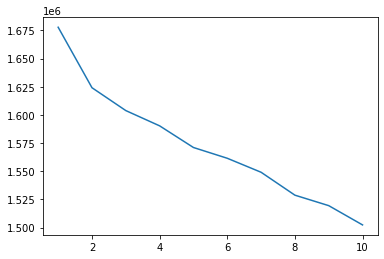

In [142]:
plt.plot(range(1, 11), sse)
plt.show()

Primera question encontrada: el metodo elbow no hace un elbow muy claro, lo que nos dice que el modelo no puede diferencias muy bien los grupos.  
Voy seguir para ver que score tendremos.

In [308]:
# Since the model is mainly separating the 2 groups in males and females, we´ll use k=4 to get more meaninfull results
classifier_kmeans = KMeans(n_clusters=4)
classifier_kmeans.fit(df_ml_humanos_1_std)

KMeans(n_clusters=4)

In [309]:
classifier_kmeans.predict(df_ml_humanos_1_std)

array([2, 2, 2, ..., 1, 1, 1])

**Inertia:**  

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

A good model is one with low inertia and a low number of clusters (K).

**Silhouette Score:**  

The value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighbouring clusters. A negative score [-1, 0] indicate that the samples might have got assigned to the wrong clusters.

In [310]:
inertia = classifier_kmeans.inertia_
silhouette = silhouette_score(df_ml_humanos_1_std, classifier_kmeans.labels_)

print(f'Inertia: {inertia:.3f}')
print(f'Silhouette Score: {silhouette}')

Inertia: 1591589.856
Silhouette Score: 0.03244743669588691


Resultados muy malos: Inertia alto y silhouette muy bajo, lo que significa que los puntos están distantes de los centroids y los grupos sin mucha definicion entre ellos.

In [311]:
# Print labels count
print(f'Label 0: {classifier_kmeans.labels_.tolist().count(0)}')
print(f'Label 1: {classifier_kmeans.labels_.tolist().count(1)}')
print(f'Label 2: {classifier_kmeans.labels_.tolist().count(2)}')
print(f'Label 3: {classifier_kmeans.labels_.tolist().count(3)}')

print(f'Sum of all labels: {len(classifier_kmeans.labels_.tolist())}')

Label 0: 114
Label 1: 9771
Label 2: 5162
Label 3: 782
Sum of all labels: 15829


In [312]:
# Add 'labels' column on original pre-processed df
df_fuente_ml_humanos_1['Labels'] = classifier_kmeans.labels_

In [315]:
#df_fuente_ml_humanos_1

In [313]:
# Group by Labels in order to withdraw first conclusions about it
df_fuente_ml_humanos_1.groupby('Labels').mean()

,amount_$,rarity,'Bandana','Beanie','BigBeard','BigShades','BlackLipstick','BlondeBob','BlondeShort','BlueEyeShadow','BuckTeeth','Cap','CapForward','Chinstrap','Choker','Cigarette','ClassicShades','ClownEyesBlue','ClownEyesGreen','ClownHairGreen','ClownNose','CowboyHat','CrazyHair','DGlasses','DarkHair','Do-rag','Earring','EyeMask','EyePatch','Fedora','FrontBeard','FrontBeardDark','Frown','FrumpyHair','Goat','GoldChain','GreenEyeShadow','HalfShaved','Handlebars','Headband','HiddenBuckTeeth','HiddenEarring','HiddenFrown','HiddenHandlebars','HiddenLipstick','HiddenMole','HiddenMustache','HiddenSmile','Hoodie','HornedRimGlasses','HotLipstick','KnittedCap','LuxuriousBeard','MedicalMask','MessyHair','Mohawk','MohawkDark','MohawkThin','Mole','Mustache','Muttonchops','NerdGlasses','NormalBeard','NormalBeardBlack','OrangeSide','PeakSpike','Pigtails','PilotHelmet','PinkWithHat','Pipe','PoliceCap','PurpleEyeShadow','PurpleHair','PurpleLipstick','RedMohawk','RegularShades','RosyCheeks','ShadowBeard','ShavedHead','SilverChain','SmallShades','Smile','Spots','StraightHair','StraightHairBlonde','StraightHairDark','StringyHair','TassleHat','Tiara','TopHat','VR','VampireHair','Vape','WeldingGoggles','WildBlonde','WildHair','WildWhiteHair',traits_counts,year,month,day,type.1_Female,type.1_Male,skin_Albino,skin_Dark,skin_Light,skin_Mid
Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,81010.221579,1423.605263,0.000000,0.000000,0.00000,0.026316,0.043860,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.087719,0.070175,0.078947,0.035088,0.000000,0.017544,0.000000,0.000000,0.043860,0.000000,0.000000,0.140351,0.017544,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087719,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008772,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043860,0.000000,0.000000,0.078947,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.035088,0.000000,0.105263,0.000000,0.184211,0.000000,0.043860,0.035088,0.000000,0.000000,0.087719,0.000000,0.000000,0.087719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,0.000000,0.070175,1.0,0.000000,0.000000,2.631579,2019.938596,5.324561,16.535088,1.0,0.0,0.070175,0.228070,0.385965,0.315789
1,50439.340072,5747.198240,0.056494,0.009313,0.02139,0.061406,0.000000,0.000000,0.000000,0.000000,0.007369,0.037355,0.043803,0.059359,0.000000,0.090062,0.061202,0.025893,0.022516,0.015761,0.021492,0.020776,0.030805,0.022720,0.000000,0.056903,0.259748,0.038788,0.062532,0.032750,0.052298,0.000000,0.047487,0.051479,0.057005,0.013407,0.000000,0.00000,0.048204,0.054754,0.0,0.005731,0.00655,0.000716,0.000000,0.005322,0.000205,0.004401,0.033364,0.063146,0.000000,0.047897,0.035616,0.016580,0.050865,0.044929,0.044724,0.055163,0.071129,0.054344,0.057005,0.061406,0.054242,0.040835,0.00000,0.046976,0.000000,0.000000,0.000000,0.029884,0.028963,0.000000,0.000000,0.000000,0.000000,0.060485,0.010030,0.087094,0.056596,0.023334,0.061202,0.036639,0.011667,0.000000,0.000000,0.000000,0.058438,0.000000,0.000000,0.016580,0.034285,0.032852,0.022311,0.000000,0.0,0.048716,0.000000,2.803295,2020.208679,5.624501,15.931532,0.0,1.0,0.090676,0.310408,0.300788,0.298127
2,53519.260225,4707.220070,0.053855,0.000000,0.00000,0.036033,0.185006,0.027702,0.029252,0.076133,0.000000,0.021891,0.000000,0.000000,0.011623,0.105773,0.053468,0.066835,0.070709,0.018985,0.016854,0.000000,0.041069,0.019179,0.049012,0.000000,0.258427,0.018791,0.020535,0.000000,0.000000,0.000000,0.000000,0.036420,0.000000,0.011623,0.063348,0.03642,0.000000,0.025959,0.0,0.105579,0.00000,0.000000,0.005231,0.001356,0.000000,0.000000,0.000000,0.040294,0.171639,0.034095,0.000000,0.015498,0.034870,0.053080,0.053468,0.047850,0.092793,0.000000,0.000000,0.050368,0.000000,0.000000,0.01666,0.000000,0.020535,0.012592,0.021697,0.032158,0.000000,0.07

# 2 - Con tratamiento de outliers

In [182]:
# Convert year, month, day from str to numeric
df_fuente_ml_humanos_1['day'] = pd.to_numeric(df_fuente_ml_humanos_1['day'])

In [240]:
# Remove outliers with amount_$ bigger than 100000
df_ml_humanos_2_nooutl = df_fuente_ml_humanos_1[df_fuente_ml_humanos_1['amount_$']<100000]

In [253]:
# we have removed 2414 lines from the df
df_fuente_ml_humanos_1['amount_$'].count() - df_ml_humanos_2_nooutl['amount_$'].count()

2414

In [250]:
df_ml_humanos_2_nooutl.describe()

,amount_$,rarity,'Bandana','Beanie','BigBeard','BigShades','BlackLipstick','BlondeBob','BlondeShort','BlueEyeShadow','BuckTeeth','Cap','CapForward','Chinstrap','Choker','Cigarette','ClassicShades','ClownEyesBlue','ClownEyesGreen','ClownHairGreen','ClownNose','CowboyHat','CrazyHair','DGlasses','DarkHair','Do-rag','Earring','EyeMask','EyePatch','Fedora','FrontBeard','FrontBeardDark','Frown','FrumpyHair','Goat','GoldChain','GreenEyeShadow','HalfShaved','Handlebars','Headband','HiddenBuckTeeth','HiddenEarring','HiddenFrown','HiddenHandlebars','HiddenLipstick','HiddenMole','HiddenMustache','HiddenSmile','Hoodie','HornedRimGlasses','HotLipstick','KnittedCap','LuxuriousBeard','MedicalMask','MessyHair','Mohawk','MohawkDark','MohawkThin','Mole','Mustache','Muttonchops','NerdGlasses','NormalBeard','NormalBeardBlack','OrangeSide','PeakSpike','Pigtails','PilotHelmet','PinkWithHat','Pipe','PoliceCap','PurpleEyeShadow','PurpleHair','PurpleLipstick','RedMohawk','RegularShades','RosyCheeks','ShadowBeard','ShavedHead','SilverChain','SmallShades','Smile','Spots','StraightHair','StraightHairBlonde','StraightHairDark','StringyHair','TassleHat','Tiara','TopHat','VR','VampireHair','Vape','WeldingGoggles','WildBlonde','WildHair','WildWhiteHair',traits_counts,year,month,day,type.1_Female,type.1_Male,skin_Albino,skin_Dark,skin_Light,skin_Mid,Labels
count,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.0,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000,13415.000000
mean,24864.725747,5447.456578,0.058367,0.004398,0.012971,0.052926,0.060753,0.009467,0.008871,0.025494,0.004622,0.031830,0.027134,0.037570,0.003280,0.092956,0.058218,0.040328,0.038986,0.015058,0.022288,0.011554,0.034215,0.015580,0.015505,0.038837,0.255162,0.032277,0.048528,0.022512,0.033246,0.034588,0.031159,0.047186,0.036154,0.012747,0.019456,0.011256,0.032203,0.044950,0.0,0.037570,0.004771,0.000522,0.001714,0.003578,0.000149,0.002907,0.015058,0.058069,0.056877,0.044502,0.019978,0.015878,0.046291,0.048453,0.047857,0.053820,0.077898,0.035334,0.036601,0.058964,0.034514,0.025568,0.003056,0.032128,0.004994,0.002982,0.006411,0.029072,0.018934,0.026836,0.015058,0.054491,0.011405,0.052255,0.012672,0.056504,0.038912,0.020052,0.042788,0.020872,0.013194,0.015654,0.011927,0.015729,0.063064,0.012672,0.003131,0.007007,0.028923,0.021394,0.022214,0.004547,0.005442,0.043459,0.008722,2.836004,2020.060977,5.291763,16.274842,0.326947,0.673053,0.092508,0.313902,0.290943,0.302646,0.673053
std,28273.113601,2752.407562,0.234446,0.066174,0.113152,0.223894,0.238885,0.096841,0.093769,0.157625,0.067828,0.175554,0.162479,0.190161,0.057179,0.290381,0.234165,0.196735,0.193569,0.121787,0.147626,0.106872,0.181789,0.123847,0.123555,0.193214,0.435969,0.176742,0.2

In [241]:
# Standardize values
scaler = StandardScaler()
df_ml_humanos_2_std = scaler.fit_transform(df_ml_humanos_2_nooutl)

In [242]:
# Create sum of squared error list to hold this values (inertia_) in order to see what´s the best value for k (Elbow Method)
sse = []
for k in range(1, 11):
    classifier_kmeans = KMeans(n_clusters=k)
    classifier_kmeans.fit(df_ml_humanos_2_std)
    sse.append(classifier_kmeans.inertia_)

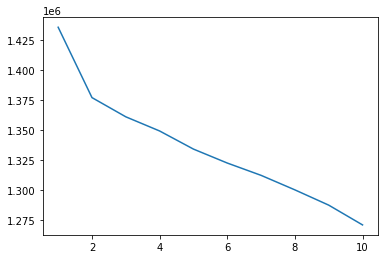

In [243]:
plt.plot(range(1, 11), sse)
plt.show()

In [316]:
classifier_kmeans = KMeans(n_clusters=4)
classifier_kmeans.fit(df_ml_humanos_2_std)

KMeans(n_clusters=4)

In [317]:
classifier_kmeans.predict(df_ml_humanos_2_std)

array([3, 3, 3, ..., 0, 0, 0])

In [318]:
inertia = classifier_kmeans.inertia_
silhouette = silhouette_score(df_ml_humanos_2_std, classifier_kmeans.labels_)

print(f'Inertia: {inertia:.3f}')
print(f'Silhouette Score: {silhouette}')

Inertia: 1348551.775
Silhouette Score: 0.00019517345602115658


Pequeña mejora del modelo anterior

# 3 - Con tratamiento de ouliers + PCA

In [267]:
df_ml_humanos_2_nooutl.shape

(13415, 108)

In [319]:
# Apply PCA transformation
pca = PCA(n_components=2)
df_ml_humanos_3_pca = pca.fit_transform(df_ml_humanos_2_std)

In [320]:
#print(pca.singular_values_)

#print(df_ml_humanos_3_pca.shape)

In [303]:
# Create sum of squared error list to hold this values (inertia_) in order to see what´s the best value for k (Elbow Method)
sse = []
for k in range(1, 11):
    classifier_kmeans = KMeans(n_clusters=k)
    classifier_kmeans.fit(df_ml_humanos_3_pca)
    sse.append(classifier_kmeans.inertia_)

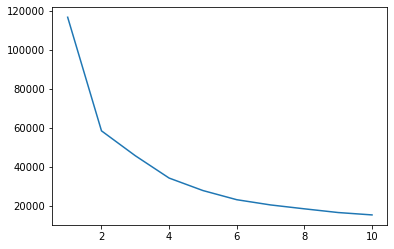

In [304]:
plt.plot(range(1, 11), sse)
plt.show()

In [321]:
classifier_kmeans = KMeans(n_clusters=4)
classifier_kmeans.fit(df_ml_humanos_3_pca)

KMeans(n_clusters=4)

In [322]:
classifier_kmeans.predict(df_ml_humanos_3_pca)

array([2, 2, 2, ..., 1, 1, 1])

In [323]:
inertia = classifier_kmeans.inertia_
silhouette = silhouette_score(df_ml_humanos_3_pca, classifier_kmeans.labels_)

print(f'Inertia: {inertia:.3f}')
print(f'Silhouette Score: {silhouette}')

Inertia: 15018.608
Silhouette Score: 0.5424870854894539


Using PCA with 2 components we have a significant improvement on the results.

In [324]:
# Print labels count
print(f'Label 0: {classifier_kmeans.labels_.tolist().count(0)}')
print(f'Label 1: {classifier_kmeans.labels_.tolist().count(1)}')
print(f'Label 2: {classifier_kmeans.labels_.tolist().count(2)}')
print(f'Label 3: {classifier_kmeans.labels_.tolist().count(3)}')

print(f'Sum of all labels: {len(classifier_kmeans.labels_.tolist())}')

Label 0: 477
Label 1: 6298
Label 2: 3912
Label 3: 2728
Sum of all labels: 13415


In [325]:
# Add 'labels' column on original pre-processed df
df_ml_humanos_2_nooutl['Labels'] = classifier_kmeans.labels_

<ipython-input-325-4a2d50e41550>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml_humanos_2_nooutl['Labels'] = classifier_kmeans.labels_


In [327]:
#print('Label 0 - Male')
#print('Label 1 - Female')

In [326]:
# Group by Labels in order to withdraw first conclusions about it
df_ml_humanos_2_nooutl.groupby('Labels').mean()

,amount_$,rarity,'Bandana','Beanie','BigBeard','BigShades','BlackLipstick','BlondeBob','BlondeShort','BlueEyeShadow','BuckTeeth','Cap','CapForward','Chinstrap','Choker','Cigarette','ClassicShades','ClownEyesBlue','ClownEyesGreen','ClownHairGreen','ClownNose','CowboyHat','CrazyHair','DGlasses','DarkHair','Do-rag','Earring','EyeMask','EyePatch','Fedora','FrontBeard','FrontBeardDark','Frown','FrumpyHair','Goat','GoldChain','GreenEyeShadow','HalfShaved','Handlebars','Headband','HiddenBuckTeeth','HiddenEarring','HiddenFrown','HiddenHandlebars','HiddenLipstick','HiddenMole','HiddenMustache','HiddenSmile','Hoodie','HornedRimGlasses','HotLipstick','KnittedCap','LuxuriousBeard','MedicalMask','MessyHair','Mohawk','MohawkDark','MohawkThin','Mole','Mustache','Muttonchops','NerdGlasses','NormalBeard','NormalBeardBlack','OrangeSide','PeakSpike','Pigtails','PilotHelmet','PinkWithHat','Pipe','PoliceCap','PurpleEyeShadow','PurpleHair','PurpleLipstick','RedMohawk','RegularShades','RosyCheeks','ShadowBeard','ShavedHead','SilverChain','SmallShades','Smile','Spots','StraightHair','StraightHairBlonde','StraightHairDark','StringyHair','TassleHat','Tiara','TopHat','VR','VampireHair','Vape','WeldingGoggles','WildBlonde','WildHair','WildWhiteHair',traits_counts,year,month,day,type.1_Female,type.1_Male,skin_Albino,skin_Dark,skin_Light,skin_Mid
Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24110.743124,2806.069182,0.004193,0.000000,0.000000,0.037736,0.161426,0.031447,0.004193,0.104822,0.000000,0.012579,0.000000,0.000000,0.023061,0.109015,0.058700,0.067086,0.092243,0.000000,0.029350,0.000000,0.000000,0.029350,0.104822,0.000000,0.926625,0.020964,0.010482,0.000000,0.000000,0.000000,0.000000,0.044025,0.000000,0.012579,0.073375,0.046122,0.000000,0.010482,0.0,0.880503,0.00000,0.000000,0.048218,0.020964,0.000000,0.000000,0.006289,0.014675,0.184486,0.000000,0.000000,0.058700,0.002096,0.004193,0.002096,0.012579,0.085954,0.000000,0.000000,0.064990,0.000000,0.006289,0.031447,0.000000,0.000000,0.044025,0.035639,0.035639,0.000000,0.090147,0.000000,0.232704,0.012579,0.018868,0.010482,0.000000,0.000000,0.004193,0.000000,0.000000,0.010482,0.079665,0.088050,0.104822,0.002096,0.136268,0.023061,0.000000,0.058700,0.000000,0.025157,0.004193,0.002096,0.083857,0.069182,4.610063,2019.725367,5.094340,15.865828,0.993711,0.006289,0.098532,0.322851,0.220126,0.358491
1,27339.993471,6454.645443,0.065894,0.002223,0.009209,0.053509,0.000000,0.000000,0.000000,0.000000,0.000953,0.043030,0.037155,0.047158,0.000000,0.084630,0.058114,0.026834,0.026040,0.013020,0.018260,0.008415,0.035249,0.014290,0.000000,0.059860,0.152747,0.040807,0.063036,0.022864,0.045252,0.042712,0.017307,0.061289,0.056367,0.006034,0.000000,0.000000,0.044300,0.049063,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013338,0.064147,0.000000,0.052715,0.021912,0.001588,0.056050,0.053985,0.054144,0.067799,0.068434,0.056208,0.056685,0.059543,0.054779,0.026516,0.000000,0.044617,0.000000,0.000000,0.000000,0.027310,0.024770,0.000000,0.009368,0.000000,0.000000,0.062242,0.005716,0.086535,0.058908,0.016990,0.057479,0.015560,0.008574,0.000000,0.000000,0.000000,0.071610,0.000000,0.000000,0.003811,0.033344,0.013973,0.016196,0.000000,0.000000,0.049857,0.000000,2.520324,2020.280724,5.133376,16.226262,0.000000,1.000000,0.104160,0.308352,0.309622,0.277866
2,26472.977676,5108.205266,0.064417,0.000000,0.000000,0.034509,0.188650,0.028630,0.029908,0.074642,0.000000,0.024284,0.000000,0.000000,0.008436,0.100460,0.051636,0.072597,0.070041,0.019939,0.017382,0.000000,0.045757,0.011503,0.040389,0.000000,0.164877,0.019172,0.020194,0.000000,0.000000,0.000000,0.000000,0.035276,0.000000,0.010481,0.057771,0.032975,0.000000,0.028630,0.0,0.001534,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044990,0.172546,0.038855,0.000000,0.010481,0.041667,0.059049,0.060327,0.053937,0.094836,0.000000,0.000000,0.052914,0.000000,0.000000,0.006646,0.000000,0.017127,0

In [336]:
px.scatter(data_frame=df_ml_humanos_2_nooutl, x='rarity', y='amount_$', color='Labels')

In [329]:
df_ml_humanos_2_nooutl.head(1)

,amount_$,rarity,'Bandana','Beanie','BigBeard','BigShades','BlackLipstick','BlondeBob','BlondeShort','BlueEyeShadow','BuckTeeth','Cap','CapForward','Chinstrap','Choker','Cigarette','ClassicShades','ClownEyesBlue','ClownEyesGreen','ClownHairGreen','ClownNose','CowboyHat','CrazyHair','DGlasses','DarkHair','Do-rag','Earring','EyeMask','EyePatch','Fedora','FrontBeard','FrontBeardDark','Frown','FrumpyHair','Goat','GoldChain','GreenEyeShadow','HalfShaved','Handlebars','Headband','HiddenBuckTeeth','HiddenEarring','HiddenFrown','HiddenHandlebars','HiddenLipstick','HiddenMole','HiddenMustache','HiddenSmile','Hoodie','HornedRimGlasses','HotLipstick','KnittedCap','LuxuriousBeard','MedicalMask','MessyHair','Mohawk','MohawkDark','MohawkThin','Mole','Mustache','Muttonchops','NerdGlasses','NormalBeard','NormalBeardBlack','OrangeSide','PeakSpike','Pigtails','PilotHelmet','PinkWithHat','Pipe','PoliceCap','PurpleEyeShadow','PurpleHair','PurpleLipstick','RedMohawk','RegularShades','RosyCheeks','ShadowBeard','ShavedHead','SilverChain','SmallShades','Smile','Spots','StraightHair','StraightHairBlonde','StraightHairDark','StringyHair','TassleHat','Tiara','TopHat','VR','VampireHair','Vape','WeldingGoggles','WildBlonde','WildHair','WildWhiteHair',traits_counts,year,month,day,type.1_Female,type.1_Male,skin_Albino,skin_Dark,skin_Light,skin_Mid,Labels
0,39866.7,5693.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2021,7,14,1,0,0,0,0,1,2


In [328]:
#df_fuente_ml[(df_fuente_ml['type.1'] == 'Female') | (df_fuente_ml['amount_$'] < 100000) | (df_fuente_ml['type'] == 'Sold')].describe()

In [282]:
df_fuente_ml.head(1)

,Unnamed: 0_x,index,id,punk_id,type,from,to,amount_ether,amount_$,date,id.1,rarity,type.1,skin,traits,'Bandana','Beanie','BigBeard','BigShades','BlackLipstick','BlondeBob','BlondeShort','BlueEyeShadow','BuckTeeth','Cap','CapForward','Chinstrap','Choker','Cigarette','ClassicShades','ClownEyesBlue','ClownEyesGreen','ClownHairGreen','ClownNose','CowboyHat','CrazyHair','DGlasses','DarkHair','Do-rag','Earring','EyeMask','EyePatch','Fedora','FrontBeard','FrontBeardDark','Frown','FrumpyHair','Goat','GoldChain','GreenEyeShadow','HalfShaved','Handlebars','Headband','HiddenBuckTeeth','HiddenEarring','HiddenFrown','HiddenHandlebars','HiddenLipstick','HiddenMole','HiddenMustache','HiddenSmile','Hoodie','HornedRimGlasses','HotLipstick','KnittedCap','LuxuriousBeard','MedicalMask','MessyHair','Mohawk','MohawkDark','MohawkThin','Mole','Mustache','Muttonchops','NerdGlasses','NormalBeard','NormalBeardBlack','OrangeSide','PeakSpike','Pigtails','PilotHelmet','PinkWithHat','Pipe','PoliceCap','PurpleEyeShadow','PurpleHair','PurpleLipstick','RedMohawk','RegularShades','RosyCheeks','ShadowBeard','ShavedHead','SilverChain','SmallShades','Smile','Spots','StraightHair','StraightHairBlonde','StraightHairDark','StringyHair','TassleHat','Tiara','TopHat','VR','VampireHair','Vape','WeldingGoggles','WildBlonde','WildHair','WildWhiteHair',Unnamed: 0_y,traits_counts,trans_type,year,month,day
0,17,100010,0x953cae,6401,Sold,0x577eBC,0x561786,19.99,39866.7,2021-07-14,6401,5693.0,Female,Mid,"['BlackLipstick', 'BlueEyeShadow', 'MessyHair']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,3,Sold,2021,07,14


In [596]:
# Check price outliers
px.box(data_frame=df_ml_dummies_humanos, y='amount_$')

In [4]:
df_fuente_sold.head(1)

df_traits_dummies = pd.read_csv('transactions_punks_dummies.csv')

# SOPORTE

#df_fuente_sold["cantidad_traits"] = df_fuente_sold["traits"].apply(lambda x: len(x.split(",")))
#df_fuente_sold["day"] = df_fuente_sold["date"].apply(lambda x: x.split("-")[2])
df_fuente_sold_humanos = df_fuente_sold[(df_fuente_sold['type.1'] == 'Male') | (df_fuente_sold['type.1'] == 'Female')]

df_fuente_sold_humanos

df_ml_humanos = df_fuente_sold_humanos[["from", "to", "amount_$", "date", "rarity", "type.1", "skin", "Year", "cantidad_traits"]]

NameError: name 'df_fuente_sold' is not defined

In [65]:
df_traits_dummies.head(1)

,Unnamed: 0,index,punk_id,trans_type,from,to,amount_ether,amount_$,date,rarity,type,skin,traits,traits_counts,'Bandana','Beanie,'Beanie','BigBeard,'BigBeard','BigShades,'BigShades','BlackLipstick,'BlackLipstick','BlondeBob,'BlondeBob','BlondeShort,'BlondeShort','BlueEyeShadow,'BlueEyeShadow','BuckTeeth,'BuckTeeth','Cap,'Cap','CapForward,'CapForward','Chinstrap,'Chinstrap','Choker,'Choker','Cigarette,'Cigarette','ClassicShades,'ClassicShades','ClownEyesBlue,'ClownEyesBlue','ClownEyesGreen,'ClownEyesGreen','ClownHairGreen,'ClownHairGreen','ClownNose,'ClownNose','CowboyHat,'CowboyHat','CrazyHair,'CrazyHair','DarkHair,'DarkHair','Do-rag,'Do-rag','Earring,'Earring','EyeMask,'EyeMask','EyePatch,'EyePatch','Fedora,'Fedora','FrontBeard,'FrontBeard','FrontBeardDark,'FrontBeardDark','Frown,'Frown','FrumpyHair,'FrumpyHair','Goat,'Goat','GoldChain,'GoldChain','GreenEyeShadow,'GreenEyeShadow','HalfShaved,'HalfShaved','Handlebars,'Handlebars','Headband,'Headband','HiddenBuckTeeth,'HiddenEarring,'HiddenEarring','HiddenFrown,'HiddenHandlebars,'HiddenLipstick,'HiddenMole,'HiddenMole','HiddenMustache,'HiddenSmile,'Hoodie,'Hoodie','HornedRimGlasses,'HornedRimGlasses','HotLipstick,'HotLipstick','KnittedCap,'KnittedCap','LuxuriousBeard,'LuxuriousBeard','MedicalMask,'MedicalMask','MessyHair,'MessyHair','Mohawk,'Mohawk','MohawkDark,'MohawkDark','MohawkThin,'MohawkThin','Mole,'Mole','Mustache,'Mustache','Muttonchops,'Muttonchops','NerdGlasses,'NerdGlasses','NormalBeard,'NormalBeard','NormalBeardBlack,'NormalBeardBlack','OrangeSide,'OrangeSide','PeakSpike,'PeakSpike','Pigtails,'Pigtails','PilotHelmet,'PilotHelmet','PinkWithHat,'PinkWithHat','Pipe,'Pipe','PoliceCap,'PoliceCap','PurpleEyeShadow,'PurpleEyeShadow','PurpleHair,'PurpleHair','PurpleLipstick,'PurpleLipstick','RedMohawk,'RedMohawk','RegularShades,'RegularShades','RosyCheeks,'RosyCheeks','ShadowBeard,'ShadowBeard','ShavedHead,'ShavedHead','SilverChain,'SilverChain','SmallShades,'SmallShades','Smile,'Smile','Spots,'Spots','StraightHair,'StraightHair','StraightHairBlonde,'StraightHairBlonde','StraightHairDark,'StraightHairDark','StringyHair,'StringyHair','TassleHat,'TassleHat','Tiara,'Tiara','TopHat,'TopHat','VR,'VR','VampireHair,'VampireHair','Vape,'Vape','WeldingGoggles,'WeldingGoggles','WildBlonde,'WildBlonde','WildHair,'WildHair','WildWhiteHair,'WildWhiteHair',Bandana,Bandana',Beanie,Beanie',BigBeard,BigBeard',BigShades,BigShades',BlackLipstick,BlackLipstick',BlondeBob,BlondeBob',BlondeShort,BlondeShort',BlueEyeShadow,BlueEyeShadow',BuckTeeth',Cap,Cap',CapForward,CapForward',Chinstrap,Chinstrap',Choker,Choker',Cigarette,Cigarette',ClassicShades,ClassicShades',ClownEyesBlue,ClownEyesBlue',ClownEyesGreen,ClownEyesGreen',ClownHairGreen,ClownHairGreen',ClownNose,ClownNose',CowboyHat,CowboyHat',CrazyHair,CrazyHair',DGlasses,DGlasses',DarkHair,DarkHair',Do-rag,Do-rag',Earring,Earring',EyeMask',EyePatch,EyePatch',Fedora,Fedora',FrontBeard,FrontBeard',FrontBeardDark,FrontBeardDark',Frown,Frown',FrumpyHair,FrumpyHair',Goat,Goat',GoldChain',GreenEyeShadow,GreenEyeShadow',HalfShaved,HalfShaved',Handlebars,Handlebars',Headband,Headband',Hoodie,Hoodie',HornedRimGlasses,HornedRimGlasses',HotLipstick,HotLipstick',KnittedCap,KnittedCap',LuxuriousBeard,LuxuriousBeard',MedicalMask,MedicalMask',MessyHair,MessyHair',Mohawk,Mohawk',MohawkDark,MohawkDark',MohawkThin,MohawkThin',Mole,Mole',Mustache,Mustache',Muttonchops,Muttonchops',NerdGlasses,NerdGlasses',NormalBeard,NormalBeard',NormalBeardBlack,NormalBeardBlack',OrangeSide,OrangeSide',PeakSpike,PeakSpike',Pigtails,Pigtails',PilotHelmet,PilotHelmet',PinkWithHat,PinkWithHat',Pipe,Pipe',PoliceCap,PoliceCap',PurpleEyeShadow,PurpleEyeShadow',PurpleHair,PurpleHair',PurpleLipstick,PurpleLipstick',RedMohawk,RedMohawk',RegularShades,RegularShades',RosyCheeks,RosyCheeks',ShadowBeard,ShadowBeard',ShavedHead,ShavedHead',SilverChain,SilverChain',SmallShades,SmallShades',Smile,Smile',Spots,Spots',StraightHair,StraightHairBlonde,StraightHairBlonde',StraightHairDark,StraightHa

In [ ]:


df_ml_dummies_humanos = pd.get_dummies(data=df_ml_humanos, columns=["type.1", "skin"])

In [594]:
# SOPORTE

#df_ml_dummies_humanos.drop(columns=["date"], axis=1, inplace=True)
#df_ml_dummies_humanos = df_ml_dummies_humanos.astype({'Year':int})

In [595]:
df_ml_dummies_humanos.head(1)

df_ml_dummies_humanos.describe()

,from,to,amount_$,rarity,Year,cantidad_traits,type.1_Female,type.1_Male,skin_Albino,skin_Dark,skin_Light,skin_Mid
104242,0x5b098b,0xc352b5,3.42,3440.0,2017,3,0,1,0,0,0,1


In [597]:
df_ml_dummies_humanos.drop(columns=['from', 'to'], axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15829 entries, 104242 to 72635
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   amount_$         15829 non-null  float64
 1   rarity           15829 non-null  float64
 2   Year             15829 non-null  int32  
 3   cantidad_traits  15829 non-null  int64  
 4   type.1_Female    15829 non-null  uint8  
 5   type.1_Male      15829 non-null  uint8  
 6   skin_Albino      15829 non-null  uint8  
 7   skin_Dark        15829 non-null  uint8  
 8   skin_Light       15829 non-null  uint8  
 9   skin_Mid         15829 non-null  uint8  
dtypes: float64(2), int32(1), int64(1), uint8(6)
memory usage: 649.2 KB


In [599]:
df_ml_dummies_humanos_nooutl.describe()

,amount_$,rarity,Year,cantidad_traits,type.1_Female,type.1_Male,skin_Albino,skin_Dark,skin_Light,skin_Mid
count,14027.000000,14027.000000,14027.000000,14027.000000,14027.000000,14027.000000,14027.0,14027.000000,14027.000000,14027.000000
mean,44143.221487,5331.482641,2020.190704,2.841591,0.331432,0.668568,0.0,0.342554,0.324873,0.332573
std,58666.993410,2784.259130,1.253794,0.809981,0.470745,0.470745,0.0,0.474581,0.468344,0.471152
min,0.000000,5.000000,2017.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,200.040000,2951.500000,2020.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,28235.500000,5461.000000,2021.000000,3.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000
75%,60877.600000,7646.000000,2021.000000,3.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000
max,296870.000000,9998.000000,2021.000000,5.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [600]:
px.box(data_frame=df_ml_dummies_humanos_nooutl, y='amount_$')

In [603]:
df_ml_dummies_humanos_pca.shape

(14027, 2)

# Plot

In [610]:
df_pca_plot = pd.DataFrame(df_ml_dummies_humanos_pca)

In [611]:
df_pca_plot = pd.concat([df_pca_plot, pd.DataFrame(classifier_kmeans.labels_, columns=['Label'])], axis=1)
df_pca_plot

,0,1,Label
0,-0.794590,-2.774026,1
1,-1.332744,-2.746350,1
2,2.346876,-2.734889,0
3,-1.228621,-0.569805,1
4,2.303765,-2.766696,0
...,...,...,...
14022,2.521828,2.543660,0
14023,2.163495,2.376417,0
14024,-1.037431,2.388700,1
14025,1.893196,2.580997,0


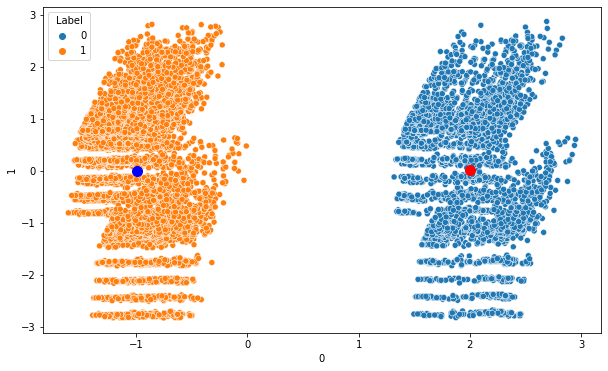

In [612]:
# Plot points and centroids using matplotlib and seaborn
plt.figure(figsize = (10, 6))
sns.scatterplot(data=df_pca_plot, x=df_pca_plot[0], y=df_pca_plot[1], hue='Label')
plt.scatter(classifier_kmeans.cluster_centers_[0][0], classifier_kmeans.cluster_centers_[0][1], c='red', s=100)
plt.scatter(classifier_kmeans.cluster_centers_[1][0], classifier_kmeans.cluster_centers_[1][1], c='blue', s=100)
plt.show()

In [1]:
classifier_kmeans.cluster_centers_

NameError: name 'classifier_kmeans' is not defined